# ZOMBIE

## Oppgave 1 

Modellen din kan inneholde mange ulike faktorer, og du står fritt
til å legge til flere, dersom du begrunner det. Legg til ´en og ´en
faktor, og test modellen etter hver gang. Kommenter populasjonsutviklinga etter hver nye faktor er lagt til.

1. Lag først et program der menneskene er trygge mot zombier,
og der nye mennesker kan komme til ved fødsel og (mer
sannsynlig) innvandring. Lag gjerne ett ledd i likninga som
inkluderer begge disse faktorene.

2. Legg inn en ressursbegrensning (bæreevne) for populasjonen. Hvilke faktorer påvirker denne?

3. Menneskene kan også dø av sykdom, skade og alderdom
(naturlig død). Legg dette inn i modellen, og tenk på hvor
sannsynlig dette er (hvor god er tilgangen på medisiner, lege
o.l.?).

4. Nå skal du legge inn en zombiepopulasjon som lever i nærheten av Alexandria. Du kan selv bestemme hvor mange
zombier som finnes og hvor sannsynlig det er at mennesker
blir drept av en zombie. Zombiene fungerer som rovdyr, slik
at menneskene ikke blir til zombier i denne modellen.

5. Nå kan du legge inn muligheten for at mennesker blir til
zombier hvis de blir bitt, men ikke revet i fillebiter. Det vil
si at noen mennesker vil bli smitta, mens andre vil bli drept
av zombiene. De som blir smitta, blir til zombier, og dermed
øker zombiepopulasjonen.

6. Alexandria kan slå tilbake mot zombiene. Legg inn en faktor
som bidrar til at menneskene kan ta livet av zombier.

7. I nærheten av Alexandria finner vi landsbyene Hilltop og
Kingdom. Fra disse kan det komme forsterkninger til Alexandria ved behov. Inkluder dette i modellen din.

### Oppgave 1

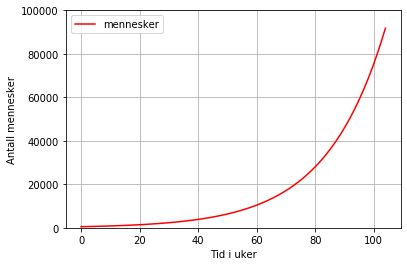

In [50]:
from pylab import * 

# Konstanter 
start_m = 500     #Start antall mennesker 
rate = 0.05       #Reproduksjonsrate 
innvandring = 2   #Innvandrerraten

# Tidsvariabler
dt = 0.5                          #To målinger i uken
tid_start = 0
tid_slutt = 104                   #Antall uker 
N = int((tid_slutt-tid_start)/dt) #Antall intervaller

# Arrayer
t = zeros(N+1)
m_p = zeros(N+1)

# Startverdier
t[0] = tid_start
m_p[0] = start_m

#Eulers metode
for i in range(N):
    pder = rate * m_p[i] + innvandring  #Endringen i menneskepopulasjonen pr dt
    m_p[i+1] = m_p[i] + pder * dt       #Menneskepopulasjonen basert på pder
    t[i+1] = t[i] + dt                  #Tid

    
#Plotting
fig = figure()
ax = fig.add_subplot(111)
data1 = ax.plot(t, m_p, '-r', label = 'Mennesker')

data = data1
datatittel = [l.get_label() for l in data]
ax.legend(data, datatittel, loc = 0)

ax.grid()
ax.set_xlabel ("Tid i uker")
ax.set_ylabel ("Antall mennesker")
ax.set_ylim(0,100000)
plt.show()


### Kommentar 
Dette er et lite paradis-land hvor ingen dør på et år og alle lever lykkelig alle sine dager i løpet av to år. Ingen dør av sykdom, zombie, sult, tørste eller hverandre. :)  
I oppgaven har vi fått oppgitt at vi starter med 500 innbyggere. Reproduksjonsraten er lav siden det er ikke så mange som blir gravide eller født i løpet av en zombieapokalypse, folk har viktigere ting å tenke på. Innvandring er den største menneskepopulasjonsøkende faktoren. Vi valgte å ta tid i uker fordi dager viser for lite endring i graf og det hadde ikke vært realistisk uten å ha endret alle våre variabler. Måneder derimot hadde gitt for få intervaller. 

## Oppgave 2

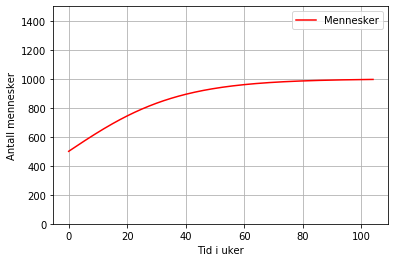

In [58]:
from pylab import * 

# Konstanter 
start_m = 500     #Start antall mennesker 
rate = 0.05       #Reproduksjonsrate 
innvandring = 2   #Innvandrerrate
b = 1000          #Bæreevnen

# Tidsvariabler
dt = 0.5
tid_start = 0
tid_slutt = 104
N = int((tid_slutt-tid_start)/dt) # Antall intervaller

# Arrayer
t = zeros(N+1)
m_p = zeros(N+1)
pder = zeros(N+1)

# Startverdier
t[0] = tid_start
m_p[0] = start_m

#Eulers metode
for i in range(N):
    pder[i] =  (rate * m_p[i] + innvandring) * (1 - m_p[i]/b)  #Endringen i menneskepopulasjon med bæreevne
    m_p[i+1] = m_p[i] + pder[i] * dt
    t[i+1] = t[i] + dt


#Plotting
fig = figure()
ax = fig.add_subplot(111)
data1 = ax.plot(t, m_p, '-r', label = 'Mennesker')

data = data1
datatittel = [l.get_label() for l in data]
ax.legend(data, datatittel, loc = 0)

ax.grid()
ax.set_xlabel ("Tid i uker")
ax.set_ylabel ("Antall mennesker")
ax.set_ylim(0,1500)
plt.show()

### Kommentar 
Her har vi bæreevnen satt på 1000 mennesker. Vi ser at mange ikke får komme inn til paradis-landet så de 1000 som er der får overleve. Her dør folk av mangel på mat, vann og plass. Men ingen dør av zombier, sykdom eller hverandre. :) 

bæreevnen er "inspirert" av en eksempeloppgave fra boka.

## Oppgave 3

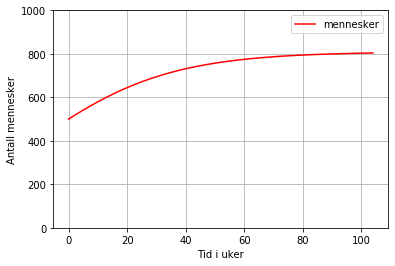

In [57]:
from pylab import * 

# Konstanter 
start_m = 500     #Start antall mennesker 
rate = 0.05       #Reproduksjonsrate 
innvandring = 2 
b = 1000 
syk_rate = 0.1
dødsrate = 0.1 * syk_rate

# Tidsvariabler
dt = 0.5
tid_start = 0
tid_slutt = 104
N = int((tid_slutt-tid_start)/dt) # Antall intervaller

# Arrayer
t = zeros(N+1)
m_p = zeros(N+1)
pder = zeros(N+1)

# Startverdier
t[0] = tid_start
m_p[0] = start_m

#Eulers metode
for i in range(N):
    pder[i] =  (rate * m_p[i] + innvandring) * (1 - m_p[i]/b) - dødsrate * m_p[i] #Endring i menneskepopulasjon med bæreevne og dødsrate
    m_p[i+1] = m_p[i] + pder[i] * dt
    t[i+1] = t[i] + dt

#Plotting
fig = figure()
ax = fig.add_subplot(111)
data1 = ax.plot(t, m_p, '-r', label = 'mennesker')

data = data1
datatittel = [l.get_label() for l in data]
ax.legend(data, datatittel, loc = 0)

ax.grid()
ax.set_xlabel ("Tid i uker")
ax.set_ylabel ("Antall mennesker")
ax.set_ylim(0,1000)
plt.show()

### Kommentar
Siden dødsraten er en funksjon av det totale anntall mennesker, vil bæreevnen synke ned til 1000 - dødsraten*1000. 10 % av befolkningen blir syke på et tidspunkt og 10% av de syke dør. Gamle folk dør av sykdom, ikke alderdom. 

## Oppgave 4

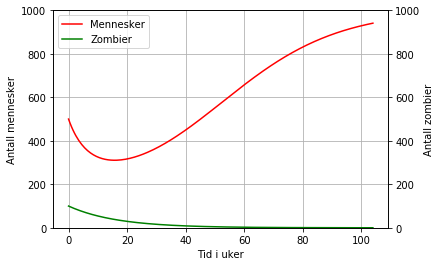

In [59]:
from pylab import * 

# Konstanter 
start_m = 500     #Start antall mennesker 
start_z = 100     #Start antall zombier
rate = 0.05       #Reproduksjonsrate 
innvandring = 2  
b = 1000 
syk_rate = 0.1
dødsrate = 0.01 * syk_rate
møterate = 0.0001 #Møterate antall ganger zombier møter mennesker 
ned_z = 0.06      #Nedgangsrate for zombier

# Tidsvariabler
dt = 0.5
tid_start = 0
tid_slutt = 104
N = int((tid_slutt-tid_start)/dt) # Antall intervaller

# Arrayer
t = zeros(N+1)
m_p = zeros(N+1)
pder = zeros(N+1)
Z = zeros(N+1)
zder = zeros(N+1)

# Startverdier
t[0] = tid_start
m_p[0] = start_m
Z[0] = start_z

#Eulers metode
for i in range(N):
    pder[i] =  (rate * m_p[i] + innvandring) * (1 - m_p[i]/b) - dødsrate * m_p[i]* Z[i]
    zder[i] =  -ned_z * Z[i]               #Endring i zombiepopulasjon
    m_p[i+1] = m_p[i] + pder[i] * dt
    Z[i + 1] = Z[i] + zder[i]* dt          #Zombiepopulasjon 
    t[i+1] = t[i] + dt

#Plotting
fig = figure()
ax = fig.add_subplot(111)
data1 = ax.plot(t, m_p, '-r', label = 'Mennesker')
ax2 = ax.twinx()
data2 = ax2.plot(t, Z, '-g', label = 'Zombier')

data = data1 + data2 
datatittel = [l.get_label() for l in data]
ax.legend(data, datatittel, loc = 0)

ax.grid()
ax.set_xlabel ("Tid i uker")
ax.set_ylabel ("Antall mennesker")
ax2.set_ylabel ("Antall zombier")
ax2.set_ylim(0,1000)
ax.set_ylim(0,1000)
plt.show()


### Kommentar 
Vi startet med 100 zombier, men siden menensker ikke kan bli zombier og zombier ikke kan reprodusere, dør zombiepopulasjonen ut. Menneskepopulasjonen går fort ned på starten siden det er mange zombier i forhold til mennesker. Zombiepopulasjonen går ned fordi zombier dør fordi de råtner bort og da kommer menneskenebestanden seg igjen.

## Oppgave 5

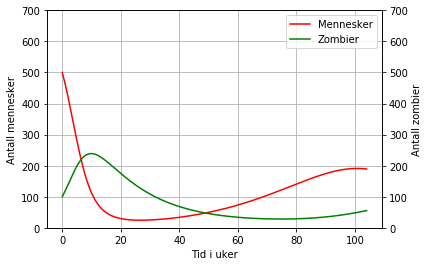

In [60]:
from pylab import * 

# Konstanter 
start_m = 500     #Start antall mennesker 
start_z = 100
rate = 0.05       #Reproduksjonsrate 
innvandring = 2  
b = 1000 
syk_rate = 0.1
dødsrate = 0.01 * syk_rate
møterate = 0.0005 
ned_z = 0.06

# Tidsvariabler
dt = 0.5
tid_start = 0
tid_slutt = 104
N = int((tid_slutt-tid_start)/dt) # Antall intervaller

# Arrayer
t = zeros(N+1)
m_p = zeros(N+1)
pder = zeros(N+1)
Z = zeros(N+1)
zder = zeros(N+1)

# Startverdier
t[0] = tid_start
m_p[0] = start_m
Z[0] = start_z

#Eulers metode
for i in range(N):
    pder[i] =  (rate * m_p[i] + innvandring) * (1 - m_p[i]/b) - dødsrate * m_p[i]* Z[i]
    zder[i] =  møterate * m_p[i] * Z[i] - ned_z * Z[i]   #Vi tar i bruk møteraten for å ha en vekst i zombiepopulasjonen
    m_p[i+1] = m_p[i] + pder[i] * dt
    Z[i + 1] = Z[i] + zder[i]* dt
    t[i+1] = t[i] + dt

#Plotting
fig = figure()
ax = fig.add_subplot(111)
data1 = ax.plot(t, m_p, '-r', label = 'Mennesker')
ax2 = ax.twinx()
data2 = ax2.plot(t, Z, '-g', label = 'Zombier')

data = data1 + data2 
datatittel = [l.get_label() for l in data]   #Vi ble 'inspirert' fra en eksempeloppgave i boka til denne plottingen 
ax.legend(data, datatittel, loc = 0)

ax.grid()
ax.set_xlabel ("Tid i uker")
ax.set_ylabel ("Antall mennesker")
ax2.set_ylabel ("Antall zombier")
ax2.set_ylim(0,700)
ax.set_ylim(0,700)
plt.show()


### Kommentar 
Her ser vi en fin liten graf som viser oss at zombiene seirer over menneskene, men siden de ikke kan reprodusere selv og er avhengige av menneskene så populasjonen minker. Menneskene lider kraftig og holder på å dø ut, men etterhvert som zombie populasjonen minker, har menneskene er liten sjanse på overlevselse. Hvis vi øker antallet av mennesker, øker zombieantallet drastisk og hvis vi øker zombieantallet så minker menneskeantallet drastisk. (Du kan endre på de ulike populasjonene for å se hvordan grafen endrer seg)


## Oppgave 6

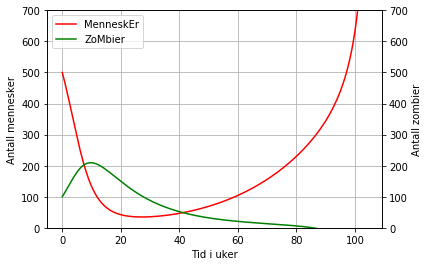

In [61]:
from pylab import * 

# Konstanter 
start_m = 500     #Start antall mennesker 
start_z = 100
rate = 0.05       #Reproduksjonsrate 
innvandring = 2  
b = 1000
syk_rate = 0.1
dødsrate = 0.01 * syk_rate
møterate = 0.0005 
drapsrate = 0.005  #Hvor mange zombier som dør grunnet mennesker 
ned_z = 0.069

# Tidsvariabler
dt = 0.5
tid_start = 0
tid_slutt = 104
N = int((tid_slutt-tid_start)/dt) # Antall intervaller

# Arrayer
t = zeros(N+1)
m_p = zeros(N+1)
pder = zeros(N+1)
Z = zeros(N+1)
zder = zeros(N+1)

# Startverdier
t[0] = tid_start
m_p[0] = start_m
Z[0] = start_z

#Eulers metode
for i in range(N):
    pder[i] =  (rate * m_p[i] + innvandring) * (1 - m_p[i]/b) - dødsrate * m_p[i] * Z[i]
    zder[i] =  møterate * m_p[i] * Z[i] - ned_z * Z[i] - drapsrate * m_p[i]  #Vi legger til en drapsrate - hvor mange zombier som dør
    m_p[i+1] = m_p[i] + pder[i] * dt
    Z[i + 1] = Z[i] + zder[i]* dt 
    t[i+1] = t[i] + dt

#Plotting
fig = figure()
ax = fig.add_subplot(111)
data1 = ax.plot(t, m_p, '-r', label = 'MenneskEr')
ax2 = ax.twinx()
data2 = ax2.plot(t, Z, '-g', label = 'ZoMbier')

data = data1 + data2 
datatittel = [l.get_label() for l in data]
ax.legend(data, datatittel, loc = 0)

ax.grid()
ax.set_xlabel ("Tid i uker")
ax.set_ylabel ("Antall mennesker")
ax2.set_ylabel ("Antall zombier")
ax2.set_ylim(0,700)
ax.set_ylim(0,700)
plt.show()


### Kommentar 
Her ser vi at flere mennesker overlever siden de kan forsvare seg selv. Selvom zombiene vinner i starten, klarer menneskene å holde seg i live lenge nok til å vinne. Etter hvert som menneskepopulasjonen vokser igjen, dreper de zombiene så sjukt. Av en aller annen uforståelig grunn ignorer koden vår bæreevnen vi har satt så vi velger å ignorere den, og det kan du også. ;) (Den fungerer hvis man setter bæreevnen til 100) 

## Oppgave 7

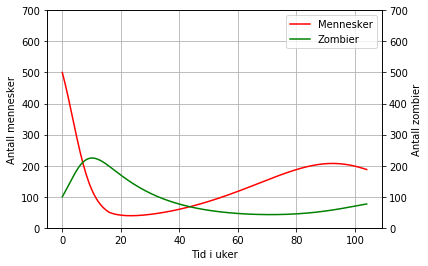

In [62]:
from pylab import * 

# Konstanter 
start_m = 500     #Start antall mennesker 
start_z = 100
rate = 0.05       #Reproduksjonsrate 
innvandring = 2  
b = 1000 
syk_rate = 0.1
dødsrate = 0.01 * syk_rate
møterate = 0.0005 
drapsrate = 0.005
ned_z = 0.06
forsterkninger = 0

# Tidsvariabler
dt = 0.5
tid_start = 0
tid_slutt = 104
N = int((tid_slutt-tid_start)/dt) # Antall intervaller

# Arrayer
t = zeros(N+1)
m_p = zeros(N+1)
pder = zeros(N+1)
Z = zeros(N+1)
zder = zeros(N+1)

# Startverdier
t[0] = tid_start
m_p[0] = start_m
Z[0] = start_z

#Eulers metode
for i in range(N):
    pder[i] =  (rate * m_p[i] + innvandring) * (1 - m_p[i]/b) - dødsrate * m_p[i]* Z[i] 
    zder[i] =  møterate * m_p[i] * Z[i] - ned_z * Z[i] - drapsrate * m_p[i]
    m_p[i+1] = m_p[i] + pder[i] * dt + forsterkninger
    Z[i + 1] = Z[i] + zder[i]* dt 
    t[i+1] = t[i] + dt
    
    if m_p[i+1] < 50: 
        forsterkninger = 1
        
    #Hvis menneskepopulasjonen går under 50, kommer forsterkninger hver gang løkka kjører 

#Plotting
fig = figure()
ax = fig.add_subplot(111)
data1 = ax.plot(t, m_p, '-r', label = 'Mennesker')
ax2 = ax.twinx()
data2 = ax2.plot(t, Z, '-g', label = 'Zombier')

data = data1 + data2 
datatittel = [l.get_label() for l in data]
ax.legend(data, datatittel, loc = 0)

ax.grid()
ax.set_xlabel ("Tid i uker")
ax.set_ylabel ("Antall mennesker")
ax2.set_ylabel ("Antall zombier")
ax2.set_ylim(0,700)
ax.set_ylim(0,700)
plt.show()


### Kommentar 
Her ser vi at zombiene aldri dør helt ut som i forrige oppgave. Det skyldes det faktum at menneskepopulasjonen aldri bli lav nok til at zombiene ikke har noe(n) å leve på. Zombienes populasjon har alltid noe å vokse av og dør derfor ikke ut. Hvis man øker antallet forsterkninger, vil grafen etterhvert stabilisere seg. 

## Egenvurdering 
Vi likte denne oppgaven. 10/10 oppgave, mye morsommere enn å simulere teite, realistiske og evt. viktige ting (korona). Vi har jobbet mye med dette og samarbeidet var på topp. Vi har lært mye om hvordan en eventuell zombieapokalypse ville fungere og nå er vi forberedt. Takk for tips til hvordan vi skal overleve.
Magnus skal nå skrive en bok om zombier med dette som en kilde så det er bare å glede seg til book-touren.

# Ekstra liten kødde - oppgave

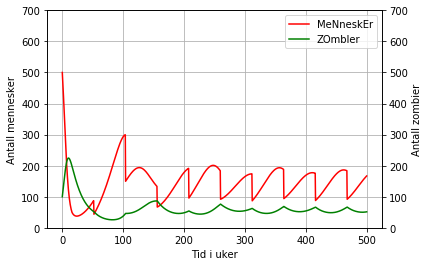

In [63]:
from pylab import * 

# Konstanter 
start_m = 500     #Start antall mennesker 
start_z = 100
rate = 0.05       #Reproduksjonsrate 
innvandring = 2  
b = 1000 
syk_rate = 0.1 
dødsrate = 0.01 * syk_rate
møterate = 0.0005 
drapsrate = 0.005
ned_z = 0.06
forsterkninger = 0
selvmord_stats = 10  
thanos_effekt = 0

# Tidsvariabler
dt = 0.5
tid_start = 0
tid_slutt = 500
N = int((tid_slutt-tid_start)/dt) # Antall intervaller

# Arrayer
t = zeros(N+1)
m_p = zeros(N+1)
pder = zeros(N+1)
Z = zeros(N+1)
zder = zeros(N+1)

# Startverdier
t[0] = tid_start
m_p[0] = start_m
Z[0] = start_z

#Eulers metode
for i in range(N):
    pder[i] =  (rate * m_p[i] + innvandring) * (1 - m_p[i]/b) - dødsrate * m_p[i]* Z[i] - selvmord_stats/m_p[i] 
    zder[i] =  møterate * m_p[i] * Z[i] - ned_z * Z[i] - drapsrate * m_p[i]
    m_p[i+1] = m_p[i] + pder[i] * dt + forsterkninger
    Z[i + 1] = Z[i] + zder[i]* dt 
    t[i+1] = t[i] + dt
    
    if m_p[i+1] < 50: 
        forsterkninger = 1
        
    if t[i+1] % 52 == 0 : 
        m_p[i+1] = m_p[i]/2


#Plotting
fig = figure()
ax = fig.add_subplot(111)
data1 = ax.plot(t, m_p, '-r', label = 'MeNneskEr')
ax2 = ax.twinx()
data2 = ax2.plot(t, Z, '-g', label = 'ZOmbIer')

data = data1 + data2 
datatittel = [l.get_label() for l in data]
ax.legend(data, datatittel, loc = 0)

ax.grid()
ax.set_xlabel ("Tid i uker")
ax.set_ylabel ("Antall mennesker")
ax2.set_ylabel ("Antall zombier")
ax2.set_ylim(0,700)
ax.set_ylim(0,700)
plt.show()


### Kommentar 
Vi la til en liten selvmordsrate og Thanos effekt som blipper halve menneskepopulasjonen hver nyttårsaften og øker mengden støv. Selvmordsraten går utifra menneskepopulasjonen, jo færre folk, jo større andel blir deprimerte og dreper seg selv. Fordi vi holder menneskepopulasjonen i sjakk, skjer det samme med zombiene. Dette er en ish- stabil graf. Altså har Thanos snappa mange ganger fordi han vant over The Avengers og de reiste ikke tilbake i tid. Takk for oss. Thank you for coming to my TED talk. 